# Exp 4: Image Compression #
## 1.	Aims ##

#### 1. Be familiar with some basic image fidelity assessment methods such as MSE, PSNR and SSIM.

#### 2. Be familiar with the process of JPEG compression.
    
#### 3. Be familiar with Discrete Cosine Transform, Huffman Coding, and Predictive Coding.

## 2.	Steps and Requirements

### (1) Compression Ratio and Relative Coding Redundancy
(a) Load the image bunny.png. Save it as a JPEG image with a quality factor of 90, 60, 10, respectively. Name the images as b90.jpg, b60.jpg, b10.jpg, respectively.

(b) Display the original image and the compressed images.

(c) Calculate the *Compression Ratio* and *Relative Data Redundancy* between the PNG image and JPEG images according to the file sizes. (Tips: ``os.path.getsize``)

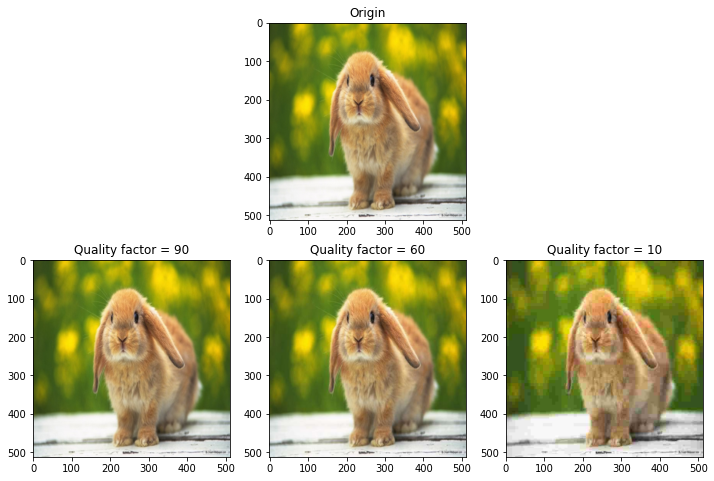

File sizes:
Origin:  383655 Bytes
Quality fator=90:  45679 Bytes
Quality fator=60:  20562 Bytes
Quality fator=10:  7969 Bytes

Compression Ratio:
Quality fator=90:  8.3989
Quality fator=60:  18.6584
Quality fator=10:  48.1434

Relative Data Redundancy:
Quality fator=90:  0.8809
Quality fator=60:  0.9464
Quality fator=10:  0.9792


In [1]:
import cv2
import matplotlib.pyplot as plt
import os

img1 = cv2.imread('./images/bunny.png')

# Save as a JPEG image with different quality factors
cv2.imwrite('./results/b90.jpg', img1, [cv2.IMWRITE_JPEG_QUALITY, 90])
cv2.imwrite('./results/b60.jpg', img1, [cv2.IMWRITE_JPEG_QUALITY, 60])
cv2.imwrite('./results/b10.jpg', img1, [cv2.IMWRITE_JPEG_QUALITY, 10])

# Convert color
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_b90 = cv2.cvtColor(cv2.imread('./results/b90.jpg'), cv2.COLOR_BGR2RGB)
img1_b60 = cv2.cvtColor(cv2.imread('./results/b60.jpg'), cv2.COLOR_BGR2RGB)
img1_b10 = cv2.cvtColor(cv2.imread('./results/b10.jpg'), cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=[12, 8])
plt.subplot(2, 3, 2)
plt.imshow(img1_rgb)
plt.title('Origin')
plt.subplot(2, 3, 4)
plt.imshow(img1_b90)
plt.title('Quality factor = 90')
plt.subplot(2, 3, 5)
plt.imshow(img1_b60)
plt.title('Quality factor = 60')
plt.subplot(2, 3, 6)
plt.imshow(img1_b10)
plt.title('Quality factor = 10')
plt.show()

# Get file sizes
img1_size = os.path.getsize('./images/bunny.png')
img_b90_size = os.path.getsize('./results/b90.jpg')
img_b60_size = os.path.getsize('./results/b60.jpg')
img_b10_size = os.path.getsize('./results/b10.jpg')

# Calculate compression ratio
CR_b90 = img1_size / img_b90_size
CR_b60 = img1_size / img_b60_size
CR_b10 = img1_size / img_b10_size

# Calculate relative data redundancy
RDR_b90 = 1 - 1/CR_b90
RDR_b60 = 1 - 1/CR_b60
RDR_b10 = 1 - 1/CR_b10

print('File sizes:')
print('Origin: ', img1_size, 'Bytes')
print('Quality fator=90: ', img_b90_size, 'Bytes')
print('Quality fator=60: ', img_b60_size, 'Bytes')
print('Quality fator=10: ', img_b10_size, 'Bytes')
print('\nCompression Ratio:')
print('Quality fator=90: ', round(CR_b90, 4))
print('Quality fator=60: ', round(CR_b60, 4))
print('Quality fator=10: ', round(CR_b10, 4))
print('\nRelative Data Redundancy:')
print('Quality fator=90: ', round(RDR_b90, 4))
print('Quality fator=60: ', round(RDR_b60, 4))
print('Quality fator=10: ', round(RDR_b10, 4))

 ### (2) Fidelity Criteria 
(a) Load the saved JPEG images. Use functions from ``skimage.metrics`` to calculate MSE, PSNR, and SSIM values between the PNG image and JPEG images. 

(b) Implement a SSIM function by yourself according to [1].

[1] Wang Z, Bovik AC, Sheikh HR, Simoncelli EP. Image quality assessment: from error visibility to structural similarity. IEEE Trans Image Process. 2004 Apr;13(4):600-12.

In [2]:
from skimage import io
from skimage.metrics import mean_squared_error as MSE
from skimage.metrics import peak_signal_noise_ratio as PSNR
from skimage.metrics import structural_similarity as SSIM
import numpy as np

img2 = io.imread('./images/bunny.png')
img2_b90 = io.imread('./results/b90.jpg')
img2_b60 = io.imread('./results/b60.jpg')
img2_b10 = io.imread('./results/b10.jpg')

# Calculate MSE
img2_b90_mse = MSE(img2, img2_b90)
img2_b60_mse = MSE(img2, img2_b60)
img2_b10_mse = MSE(img2, img2_b10)
# Calculate PSNR
img2_b90_psnr = PSNR(img2, img2_b90)
img2_b60_psnr = PSNR(img2, img2_b60)
img2_b10_psnr = PSNR(img2, img2_b10)
# Calculate SSIM
img2_b90_ssim = SSIM(img2, img2_b90, win_size=7, channel_axis=2, gaussian_weights=False)
img2_b60_ssim = SSIM(img2, img2_b60, win_size=7, channel_axis=2, gaussian_weights=False)
img2_b10_ssim = SSIM(img2, img2_b10, win_size=7, channel_axis=2, gaussian_weights=False)

print('MSE:')
print('Quality fator=90: ', round(img2_b90_mse, 4))
print('Quality fator=60: ', round(img2_b60_mse, 4))
print('Quality fator=10: ', round(img2_b10_mse, 4))
print('\nPSNR:')
print('Quality fator=90: ', round(img2_b90_psnr, 4))
print('Quality fator=60: ', round(img2_b60_psnr, 4))
print('Quality fator=10: ', round(img2_b10_psnr, 4))
print('\nSSIM:')
print('Quality fator=90: ', round(img2_b90_ssim, 4))
print('Quality fator=60: ', round(img2_b60_ssim, 4))
print('Quality fator=10: ', round(img2_b10_ssim, 4))

# Implement my SSIM function 
class mySSIM():
    def __init__(self, img1, img2, channel, k_size=7):
        self.img1 = img1.astype(np.float32)
        self.img2 = img2.astype(np.float32)
        self.channel = channel
        self.k_size = k_size

    # Take the average intensity
    def average(self, img):
        height, width = img.shape
        # Create the kernel
        ker = np.ones((self.k_size, self.k_size)).astype(np.float32)
        ker /= self.k_size**2
        # Padding
        pads = self.k_size // 2
        padding = img.copy()
        padding = np.pad(padding, (2*pads, 2*pads), mode='symmetric')

        # Average filter
        mu = padding.copy()
        for y in range(height+2*pads):
            for x in range(width+2*pads):
                mu[pads+y, pads+x] = np.sum(ker * padding[y: y+self.k_size, x: x+self.k_size])
        # Keep the same size as the origin
        mu = mu[2*pads: 2*pads+height, 2*pads: 2*pads+width]
        return mu

    # Calculate single channel (gray scale) SSIM
    def single_chaanel_ssim(self, img1, img2):
        # Dynamic range of the pixel values
        dmax = img1.max()
        dmin = img1.min()
        dynamic_range = dmax - dmin
        # Parameters
        K1 = 0.01
        K2 = 0.03
        C1 = (K1 * dynamic_range) ** 2
        C2 = (K2 * dynamic_range) ** 2

        # Compute means and variances
        ux = self.average(img1)
        uy = self.average(img2)
        uxx = self.average(img1 * img1)
        uyy = self.average(img2 * img2)
        uxy = self.average(img1 * img2)
        N = self.k_size ** 2
        # Sample covariance
        cov_norm = N / (N - 1)
        vx = cov_norm * (uxx - ux*ux)
        vy = cov_norm * (uyy - uy*uy)
        vxy = cov_norm * (uxy - ux*uy)

        # Calculate SSIM
        S = (2*ux*uy + C1) * (2*vxy + C2) / (ux**2 + uy**2 + C1) / (vx + vy + C2)
        # The mean of SSIM
        mssim = S.mean(dtype=np.float32)
        return mssim

    # Judge the number of channel and calculate SSIM
    def mssim(self):
        if self.channel == 1:
            return self.single_chaanel_ssim(self.img1, self.img2)
        
        ssims = np.empty(self.channel, dtype=np.float32)
        for ch in range(self.channel):
            img1 = self.img1[:, :, ch]
            img2 = self.img2[:, :, ch]
            ssims[ch] = self.single_chaanel_ssim(img1, img2)
        mssim = ssims.mean()
        return mssim

# Calculate SSIM by my function
img2_b90_mySSIM = mySSIM(img2, img2_b90, 3)
img2_b90_my_ssim = img2_b90_mySSIM.mssim()
img2_b60_mySSIM = mySSIM(img2, img2_b60, 3)
img2_b60_my_ssim = img2_b60_mySSIM.mssim()
img2_b10_mySSIM = mySSIM(img2, img2_b10, 3)
img2_b10_my_ssim = img2_b10_mySSIM.mssim()

print('\nMy SSIM:')
print('Quality fator=90: ', round(img2_b90_my_ssim, 4))
print('Quality fator=60: ', round(img2_b60_my_ssim, 4))
print('Quality fator=10: ', round(img2_b10_my_ssim, 4))

MSE:
Quality fator=90:  2.9622
Quality fator=60:  8.6922
Quality fator=10:  62.4752

PSNR:
Quality fator=90:  43.4147
Quality fator=60:  38.7395
Quality fator=10:  30.1737

SSIM:
Quality fator=90:  0.9804
Quality fator=60:  0.954
Quality fator=10:  0.8097

My SSIM:
Quality fator=90:  0.9796
Quality fator=60:  0.9523
Quality fator=10:  0.8037


<font size=3 color=red>This block may take a few minutes to run.</font>

### (3) Simulation of a Part of JPEG Compression
(a) Load the grayscale image lenagray.tiff.

(b) Shift the pixel intensity by -128. 

(c) Divide the image into non-overlapped 8$*$8 subimages and perform 8$*$8 block DCT on each subimage. (Tips: ``cv2.dct`` or ``scipy.fftpack.dct``)

(d) Use a quantization table with QF=50 for quantization. 

(e) Perform lossless predictive coding of DC coefficients by using difference coding relative to the previous subimage.  

(f) Sort 63 AC coefficients in each block in a ZigZag order. Converted them into a one-dimensional vector. 

(g) Save all the compressed data into a Numpy data format.(.npy or .npz file)  (Tips: ``np.save`` or ``np.savez``)

(h) Compress the npy/npz file to a zip file (refered to as NPZzip). Compress the TIFF image to another zip file (refered to as TIFFzip). (Tips: ``zipfile.Zipfile``, ``zipfile.write``, ``zipfile.close``. For more details please refer to https://docs.python.org/3/library/zipfile.html and https://cloud.tencent.com/developer/article/1431438)

(i) Calculate the Compression Ratio between the TIFF image and the NPZ file according to the file sizes. Calculate the Compression Ratio between the TIFF image and the NPZzip file according to the file sizes. Calculate the Compression Ratio between the TIFFZzip and the NPZzip according to the file sizes.

(j) Load the above saved file. Decode it to a recovered image.

(k) Compute the MSE and PSNR of the recovered image, and display it with the original image side by side.

``quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12,14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)``

Compression Ratio between the TIFF image and the NPZ file:  1.0
Compression Ratio between the TIFF image and the the NPZzip:  8.89
Compression Ratio between the TIFF image and the the TIFFZzip:  1.18
Compression Ratio between the TIFFZzip and the NPZzip:  7.54

MSE:  17.24
PSNR:  35.77


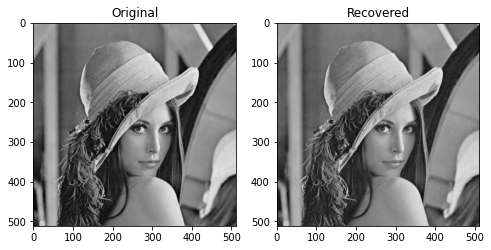

In [3]:
import zipfile
import re
from skimage import img_as_ubyte
import warnings
warnings.filterwarnings('ignore')

ZigZag = [
0, 1, 5, 6,14,15,27,28,
2, 4, 7,13,16,26,29,42,
3, 8,12,17,25,30,41,43,
9,11,18,24,31,40,44,53,
10,19,23,32,39,45,52,54,
20,22,33,38,46,51,55,60,
21,34,37,47,50,56,59,61,
35,36,48,49,57,58,62,63]

quantization_table = np.array([
[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12,14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)

# To fit into the 8*8 subimage and shift the pixel intensity by -128
def fill_and_shift(img):
    # Get the image size
    h, w = img.shape
    # The number of padding zeros
    ph, pw = 0, 0
    if h % 8 != 0:
        ph = 8 - h % 8
    if w % 8 != 0:
        pw = 8 - w % 8
    img_fill = np.pad(img, ((0, ph), (0, pw)), 'constant')

    # Shift the pixel intensity by -128
    img_shift = np.array(img_fill, dtype=np.float32) - 128
    return img_shift, h+ph, w+pw

# Divide into 8*8 subimages and compress
def divide_and_compress(img_shift):
    h, w = img_shift.shape
    # Subimages
    x = w//8
    y = h//8
    # Create the list to store data
    dc = np.zeros(x*y, dtype=np.int8)
    zigzag_ = np.zeros(64, dtype=np.int8)
    ac_ = np.array([zigzag_]*(x*y), dtype=np.int8)
    zigzag = np.zeros(63, dtype=np.int8)
    ac = np.array([zigzag]*(x*y), dtype=np.int8)

    # Divide
    for i in range(y):
        for j in range(x):
            sub = img_shift[i*8: (i+1)*8, j*8: (j+1)*8]
            # Perform DCT
            sub_dct = cv2.dct(sub)
            # Quantization
            quan = np.round(sub_dct / quantization_table)

            # Store DC component
            dc[i*x+j] = int(quan[0][0])
            # Sort AC in a ZigZag order
            for k in range(1, 64):
                ac_[i*x+j][ZigZag[k]] = int(quan[int(k/8)][k%8])
            ac[i*x+j] = ac_[i*x+j][1:]
    return dc, ac

# Perform lossless predictive coding of DC coefficients
def DC_predict(dc):
    coding = dc.copy()
    for i in range(1, len(dc)):
        coding[i] = dc[i] - dc[i-1]
    return coding

# Compress into a zip file and get info
def zip(file_path, file_name, zip_path):
    f = zipfile.ZipFile(zip_path, 'w')
    f.write(file_path, file_name, compress_type=zipfile.ZIP_DEFLATED)
    # Size before compress
    file_size = f.infolist()[0].file_size
    # Size after compress
    zip_size = f.infolist()[0].compress_size
    f.close()
    return file_size, zip_size

# Decompress to a file
def decomp_zip(zip_path, file_path):
    f = zipfile.ZipFile(zip_path)
    f.extractall(file_path)
    f.close()

# Decode DC coefficients
def DC_decode(coding):
    decode = coding.copy()
    for i in range(1, len(coding)):
        decode[i] = coding[i] + decode[i-1]
    return decode

# Combine subimages and process
def combine(Qt, dc, ac, shape):
    h, w = shape[:]
    img = np.zeros((h, w), dtype=np.int8)
    x = w//8
    y = h//8

    # UnZigZag
    for i in range(y):
        for j in range(x):
            sub_array = np.append(dc[i*x+j], ac[i*x+j])
            mtx = np.zeros((8, 8), dtype=np.float32)
            for k in range(64):
                mtx[int(k/8)][k%8] = sub_array[ZigZag[k]]
            # Requantization
            re_quan = mtx * Qt
            # Inverse DCT
            inv_dct = cv2.idct(re_quan)
            img[i*8: (i+1)*8, j*8: (j+1)*8] = inv_dct
    # Shift the pixel intensity by 128
    img = img + 128
    return img

# File paths
lena_path = './images/lenagray.tiff'
npz_path = './results/NPZfile.npz'
NPZzip_path = './results/NPZzip.zip'
TIFFzip_path = './results/TIFFzip.zip'
decomp_npz_folder = './results/decompNPZfile'
npz_name = re.findall('[^\\/:*?"<>|\r\n]+$', npz_path)[0]
lena_name = re.findall('[^\\/:*?"<>|\r\n]+$', lena_path)[0]
decomp_npz_path = decomp_npz_folder + '/' + npz_name

img3 = io.imread(lena_path)
# Fill the blanks and shift -128
img3_shift, height, width = fill_and_shift(img3)
# Divide into 8*8 subimages, perform DCT and return DC, AC component 
dc, ac = divide_and_compress(img3_shift)
# Perform predictive coding of DC
dc_coding = DC_predict(dc)
# Save as a npz file
np.savez(npz_path, Qt=quantization_table, dc=dc_coding, ac=ac, shape=[height, width])
# Compress
npz_size, NPZzip_size = zip(npz_path, npz_name, NPZzip_path)
lena_size, TIFFzip_size = zip(lena_path, lena_name, TIFFzip_path)
# Compression ratio
CR_img2npz = lena_size / npz_size
CR_img2NPZzip = lena_size / NPZzip_size
CR_img2imgzip = lena_size / TIFFzip_size
CR_imgzip2NPZzip = TIFFzip_size / NPZzip_size

# Decompress
decomp_zip(NPZzip_path, decomp_npz_folder)
# Load npz data
with np.load(decomp_npz_path) as f:
    Qt, decomp_dc, decomp_ac, shape = f['Qt'], f['dc'], f['ac'], f['shape']
# Decode DC coefficients
decomp_dc_decode = DC_decode(decomp_dc)
# Combine subimages and process
decomp_img = combine(Qt, decomp_dc_decode, decomp_ac, shape)
decomp_img = img_as_ubyte(decomp_img)

# Print the compression ratio
print('Compression Ratio between the TIFF image and the NPZ file: ', round(CR_img2npz, 2))
print('Compression Ratio between the TIFF image and the the NPZzip: ', round(CR_img2NPZzip, 2))
print('Compression Ratio between the TIFF image and the the TIFFZzip: ', round(CR_img2imgzip, 2))
print('Compression Ratio between the TIFFZzip and the NPZzip: ', round(CR_imgzip2NPZzip, 2))

# Calculate the MSE and PSNR
img3_mse = MSE(img3, decomp_img)
img3_psnr = PSNR(img3, decomp_img)
print('\nMSE: ', round(img3_mse, 2))
print('PSNR: ', round(img3_psnr, 2))

# Display
plt.figure(figsize=[8, 8])
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(decomp_img, cmap='gray')
plt.title('Recovered')
plt.show()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.